In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Project\Personal\end-to-end-ml-project"


file_in_dataset = "House_Rent_Dataset.csv"
# Load the latest version
housing = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/house-rent-prediction-dataset",
  file_in_dataset,
 
)

print("First 5 records:\n", housing.head())

print("======================")
housing.info()



<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
/tmp/ipykernel_14563/1873487585.py:5: SyntaxWarning: invalid escape sequence '\P'
  file_path = "Project\Personal\end-to-end-ml-project"
/home/luwukien/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_14563/1873487585.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  housing = kagglehub.load_dataset(


First 5 records:
     Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3         

In [3]:
# Drop some difficult columns to easy handle 
import pandas as pd
df = pd.DataFrame(housing)
housing_after = df.drop(columns=['Posted On', 'Floor', 'Area Locality'])

In [4]:
object_columns = housing_after.select_dtypes(include=['object'])

for column in object_columns:
  print(housing_after[column].value_counts(), "\n")

Area Type
Super Area     2446
Carpet Area    2298
Built Area        2
Name: count, dtype: int64 

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64 

Furnishing Status
Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: count, dtype: int64 

Tenant Preferred
Bachelors/Family    3444
Bachelors            830
Family               472
Name: count, dtype: int64 

Point of Contact
Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: count, dtype: int64 



In [5]:
housing_after.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


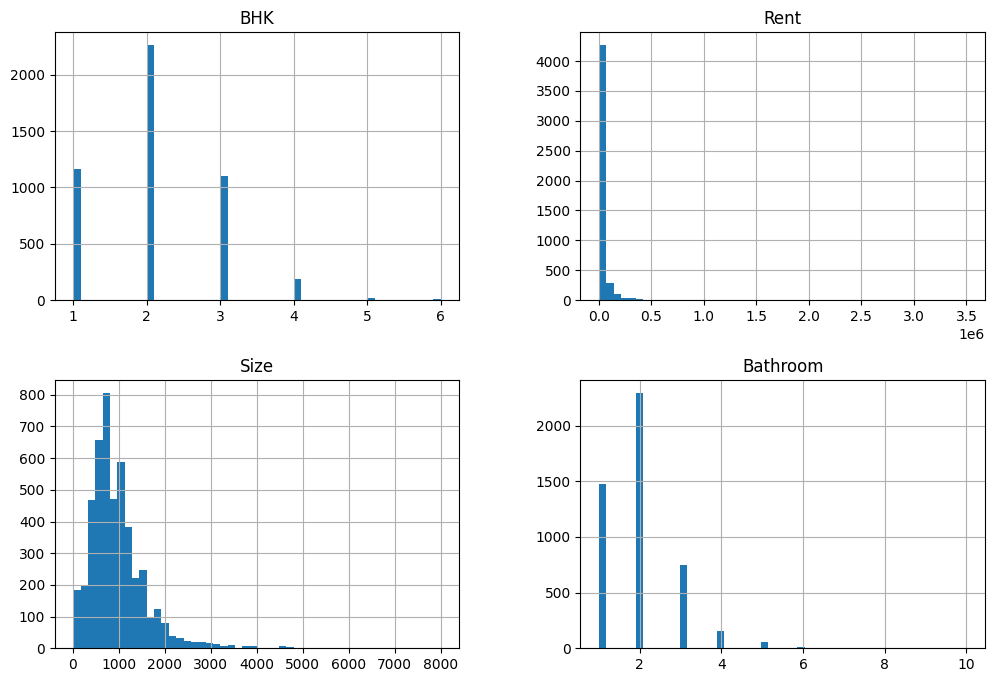

In [6]:
import matplotlib.pyplot as plt

housing_after.hist(bins=50, figsize=(12, 8))
plt.show()


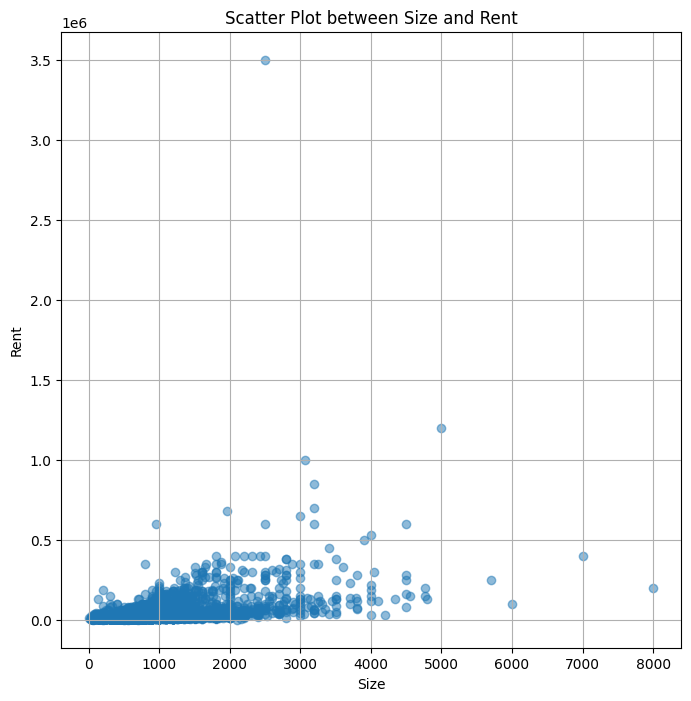

In [7]:
size = housing_after['Size']
rent = housing_after['Rent']

plt.figure(figsize=(8, 8))
plt.scatter(size, rent, alpha=0.5)
plt.title("Scatter Plot between Size and Rent")
plt.xlabel("Size")
plt.ylabel("Rent")
plt.grid(True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_after, test_size=0.2, random_state=42)

# Split labels and input(X) in train set
housing_x_train = train_set.drop("Rent", axis=1)
housing_y_train = train_set["Rent"].copy()

housing_x_train



,BHK,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1995,2,950,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
1497,2,800,Super Area,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
2763,1,545,Super Area,Delhi,Furnished,Bachelors/Family,1,Contact Owner
1351,1,465,Super Area,Mumbai,Semi-Furnished,Bachelors,1,Contact Owner
1862,2,900,Super Area,Bangalore,Furnished,Bachelors/Family,2,Contact Owner
...,...,...,...,...,...,...,...,...
4426,3,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,3,Contact Owner
466,3,1200,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
3092,2,800,Carpet Area,Chennai,Semi-Furnished,Family,2,Contact Agent
3772,3,3500,Carpet Area,Chennai,Semi-Furnished,Bachelors/Family,3,Contact Agent


In [13]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np 

num_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

text_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('onehot', OneHotEncoder(handle_unknown='ignore')),
])

num_columns = housing_x_train.select_dtypes(include=np.number).columns.tolist()

text_columns = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred']

preprocessor = ColumnTransformer([
  ('num', num_pipeline, num_columns),
  ('text', text_pipeline, text_columns),
], remainder='passthrough')

housing_prepared = preprocessor.fit_transform(housing_x_train)
housing_prepared

array([[-0.1077394636026296, -0.02691965624613847, 0.03566557955123771,
        ..., 1.0, 0.0, 'Contact Owner'],
       [-0.1077394636026296, -0.26311739515593535, 0.03566557955123771,
        ..., 1.0, 0.0, 'Contact Owner'],
       [-1.3000980753681741, -0.6646535513025901, -1.0925555869195798,
        ..., 1.0, 0.0, 'Contact Owner'],
       ...,
       [-0.1077394636026296, -0.26311739515593535, 0.03566557955123771,
        ..., 0.0, 1.0, 'Contact Agent'],
       [1.0846191481629148, 3.9884419052204088, 1.1638867460220552, ...,
        1.0, 0.0, 'Contact Agent'],
       [-1.3000980753681741, -0.8142454526121281, 0.03566557955123771,
        ..., 0.0, 0.0, 'Contact Agent']], shape=(3796, 19), dtype=object)